In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

Automatically created module for IPython interactive environment


MemoryError: 

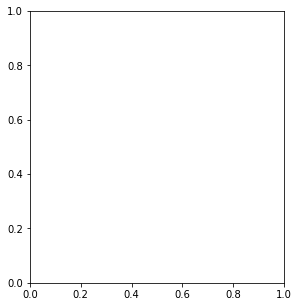

In [19]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

In [3]:
X.shape

(150, 2)

In [4]:
X[0:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---

In [6]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [7]:
f = r.TFile("../data/gm2offline_ana_18398265_1544564276.1650.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :   424000 : Total =       252303494 bytes  File  Size =  109995864 *
*        :          : Tree compression factor =   2.29                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :   424000 : Total  Size=    1698163 bytes  File Size  =      10810 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 157.03     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :   424000 : Total  Size=    1698229 bytes  File Size  =      10822 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 156.86     *
*...............................................

423919


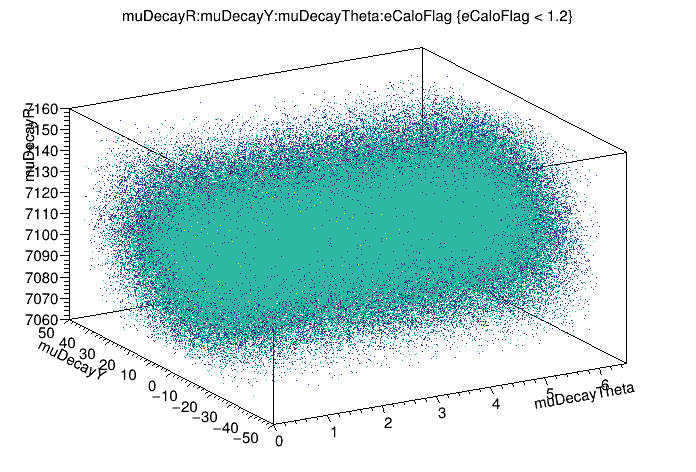

In [8]:
c = r.TCanvas()
nMu = t.Draw("muDecayR:muDecayY:muDecayTheta:eCaloFlag","eCaloFlag < 1.2","")
print(nMu)
c.Draw()

In [9]:
rawMuons = [[],[],[],[]]
for i in range(int(nMu/100)):
    rawMuons[0].append(t.GetV1()[i])
    rawMuons[1].append(t.GetV2()[i])
    rawMuons[2].append(t.GetV3()[i])
    rawMuons[3].append(t.GetV4()[i])

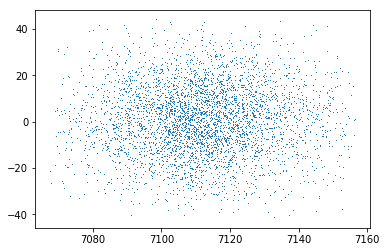

In [10]:
plt.plot(rawMuons[0],rawMuons[1],",")
plt.show()

In [11]:
X = np.array([x for x in zip(*rawMuons[0:2])]) # we only take the first two features.
y = np.array(rawMuons[3])

h = .02  # step size in the mesh

In [12]:
X[0:3]

array([[ 7.14380225e+03, -1.97034130e+01],
       [ 7.10053467e+03, -1.11043215e-01],
       [ 7.10333447e+03, -1.05539627e+01]])

In [13]:
X.size

8478

In [14]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

In [ ]:
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

In [37]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))

# Plot the predicted probabilities. For that, we will assign a color to
# each point in the mesh [x_min, m_max]x[y_min, y_max].
clf = gpc_rbf_isotropic

ding = []
for i in range(7000,7200,2):
    for j in range(-45,45,2):
        ding.append((i,j))
        
Z = clf.predict_proba(ding)

# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
            edgecolors=(0, 0, 0))

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("%s, LML: %.3f" %
          (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 9000 into shape (4362,4536,3)

<Figure size 720x360 with 0 Axes>